# 1.2 Presentacion de funciones

In [176]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
import scipy as sp
from scipy import integrate

$$ f(t) = 2 \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} sin(n t)  $$

In [177]:
def f(t,n):
    f = 2* (-1)**(n-1)/n * np.sin(n*t )
    return f

In [178]:
L = np.pi
cicles = 5
X= np.linspace(-L,L,100)

In [179]:
n = 1
nt = 50
F = 0

<IPython.core.display.Javascript object>


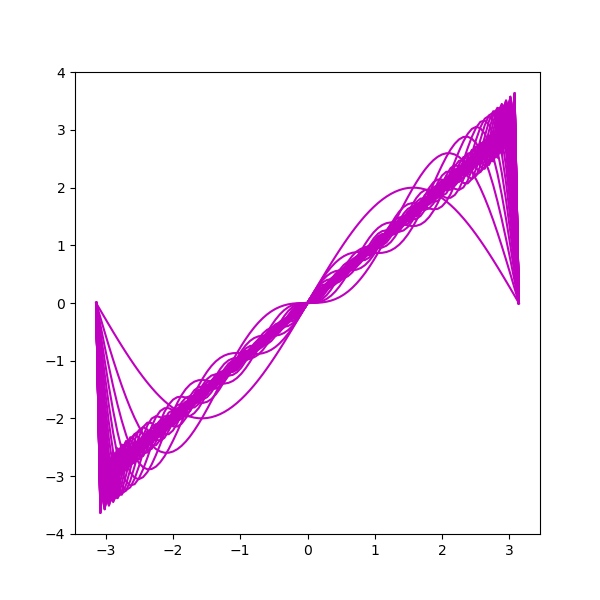

In [180]:
fig = plt.figure(figsize=(6,6))
camera = Camera(fig)


In [181]:
while n < nt:
    F += f(x,n)
    plt.plot(X,F,c='m')
    camera.snap()
    n += 1 

In [182]:
animation = camera.animate()

# 1.3 Funcion de Riemann

In [183]:
def s(n):
    t=0
    if (n>0):
        t=1/(n**6)
    return t

In [184]:
j=0
g=0

while j<100:
    g+=s(j)
    j+=1
print(g)  


1.0173430619639436


In [197]:
#from sympy import Integral, integrate 


#ft = ((1/12 *x*(x**2-(np.pi)**2)))**2
#l=np.pi
#dx = Integral(ft, (x,-l,l)).doit()
#print (dx *1/np.pi)

In [198]:
from scipy import integrate
def f(x):
    return(x**3-(np.pi**2)*x)**2

In [195]:
l=np.pi
a=-l
b=l
i=integrate.quad(f,a,b)
print(i[0]/(144*np.pi))

1.017343061984449


# 1.4  Derivada espectral


<IPython.core.display.Javascript object>


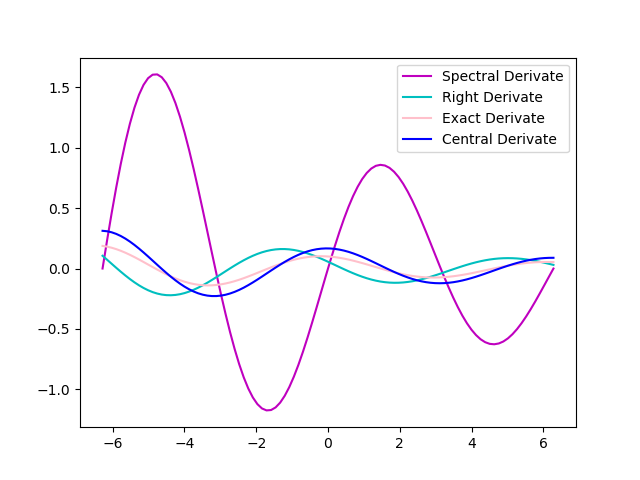

In [207]:

t=np.linspace(-2*np.pi,2*np.pi,100)
paso = 100/(4*np.pi)

def f(t):
    f = np.exp(-0.1*t)*np.sin(t)
    return f

def DerivadaCentral(f,t,h):
    d = 0
    if h != 0:
        d = (f(t+h)-f(t-h))/(2*h)
    return d

def DerivadaDerecha(f,t,h):
    d = 0
    if h != 0:
        d = (f(t+h)-f(t))/h
    return d

def DerivadaExacta(t):
    f = -0.1*np.exp(-0.1*t)*np.sin(t) + np.exp(-0.1*t)*np.cos(t)
    return f

X = np.fft.fft(f(t))
cD = DerivadaCentral(f,t,paso)
rD = DerivadaDerecha(f,t,paso)
eD = (DerivadaExacta(t))/10

freq =np.fft.fftfreq(np.size(t),np.max(eD))
Y=X*1j*freq
sD = np.fft.ifft(X)

plt.figure()
plt.plot(t,sD,color='m',label='Spectral Derivate')
plt.plot(t,rD,color='c',label='Right Derivate')
plt.plot(t,eD,color='pink',label='Exact Derivate')
plt.plot(t,cD,color='blue',label='Central Derivate')
plt.legend()
plt.show()

In [205]:
frecu=50
pasos=4*np.pi/100
F0=5
N=int(10*frecu/F0)
t=np.linspace(-2*np.pi,(N-1)*pasos-2*np.pi,N)
F_paso=frecu/N
F=np.linspace(-25,(N-1)*F_pasos-25,int(N))
f=funcion(t)
FFT=np.fft.fft(f)
F=np.fft.fftshift(F)
dfft=F*FFT*(1j)
D_esp=np.real(np.fft.ifft(dfft))


NameError: name 'F_pasos' is not defined

# 1.5 Manchas Solares

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc 
import os.path as path
import wget
import pandas as pd

In [ ]:


url = 'https://raw.githubusercontent.com/asegura4488/DataBase/main/MetodosComputacionales/ManchasSolares.dat'
if not path.exists(url):
    Path_ = wget.download(url)
    print('Descargado')
else:
    Path_ = file

In [ ]:
data = np.loadtxt(Path_)

fecha = data[:,0] + data[:,1]/12.  # escribir la fecha en unidades de años
manchas= data[:,3] 
print(fecha,manchas)

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

plt.xlabel(r"Years")
plt.ylabel(r"Frecuencia [1/mes]")

plt.plot(fecha,manchas,color="c",label =r"Manchas Solares")

a.

In [156]:
ii=fecha >1900
#b
mean=np.mean(manchas[ii])
manchas=manchas[ii]-mean
fecha=fecha[ii]

<IPython.core.display.Javascript object>


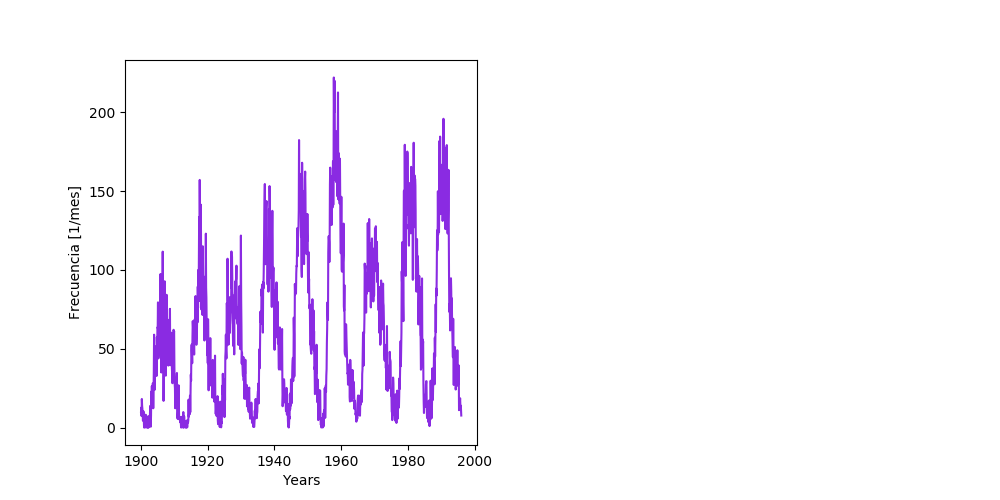

In [166]:
fig=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

plt.xlabel(r"Años")
plt.ylabel(r"Frecuencia [1/mes]")

plt.plot(fecha,manchas+mean,color="#8A2BE2",label =r"Manchas Solares")

c.

In [158]:
N=len(manchas)
fft=np.fft.fft(manchas)
Frec=np.fft.fftfreq(N,1)
ffta=np.abs(fft)

<IPython.core.display.Javascript object>


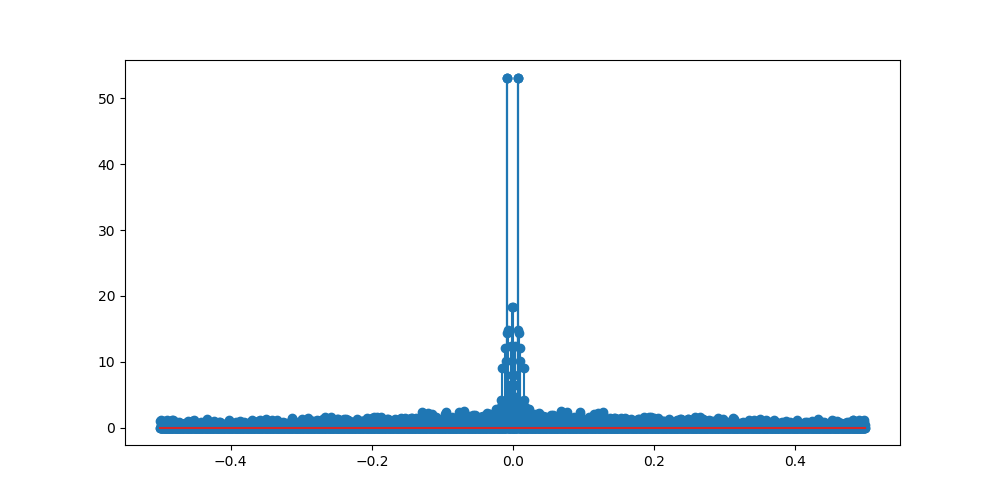

<StemContainer object of 3 artists>

In [159]:
fig=plt.figure(figsize=(10,5))
plt.stem(Frec,2.*ffta/N,use_line_collection="True")

d.

In [160]:
ii=np.argmax(ffta)
fo=Frec[ii]
T=(1./fo)/12.0
print(T)

ii_a=np.abs(Frec)>fo
ii_b=np.abs(Frec)<fo

fft[ii_a | ii_b]=0
FFTA=np.abs(fft)


10.666666666666666


<IPython.core.display.Javascript object>


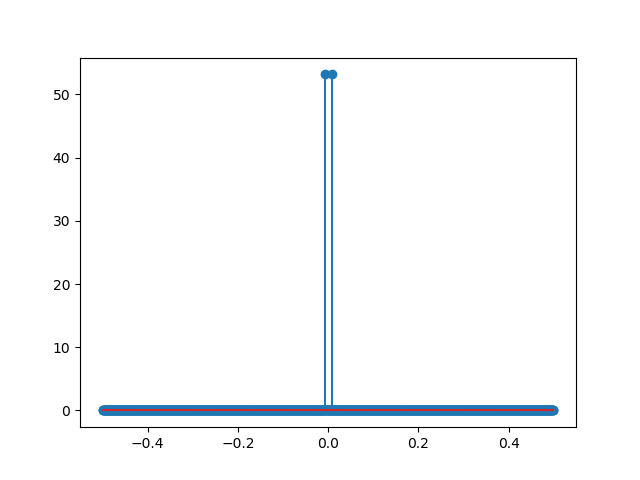

<StemContainer object of 3 artists>

In [165]:
plt.stem(Frec,2.*FFTA/N,use_line_collection="True")

d.

<IPython.core.display.Javascript object>


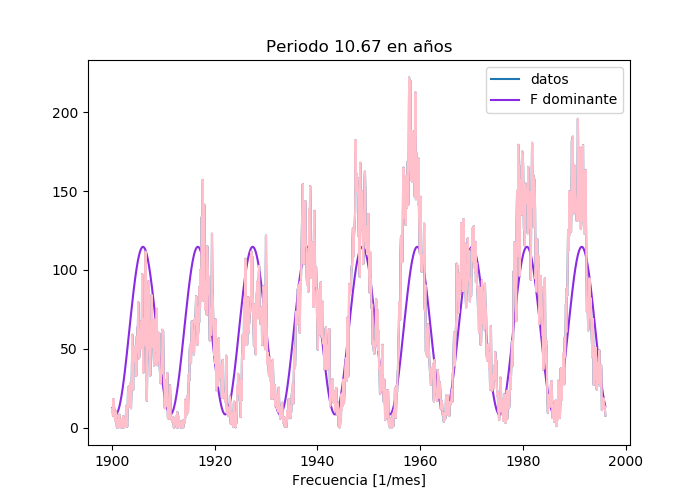

In [186]:
manchas_f=np.fft.ifft(fft)

fig=plt.figure(figsize=(7,5))
plt.subplot(1,1,1)
plt.plot(fecha,manchas+mean,label="datos")
plt.plot(fecha,np.real(manchas_f)+mean,color="#8A2BE2",label="F dominante")
plt.title("Periodo 10.67 en años")
plt.xlabel(r"Frecuencia [1/mes]")
plt.legend()
plt.plot(fecha,manchas+mean,color="pink",label =r"Manchas Solares")
